In [1]:
import json
import argparse
from collections import defaultdict
import glob
from os import path
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import numpy as np
import csv



In [3]:
# parser = argparse.ArgumentParser(
#     description='Adds metadata to a json file')
# parser.add_argument('file')
# args = parser.parse_args()

# file = args.file
files = glob.glob('data_analysis/data/*.json')
confs = defaultdict(dict)
for file in files:
    print(file)
    data = json.load(open(file, 'r'))
    conf_name = path.basename(file).split('.')[0]
    conf_name, year = conf_name.split('_')
    data = json.load(open(file, 'r'))
    for paper in data:
        try:
            paper['text'] = open(f"data_analysis/data/pdfs/{paper['id']}.txt", 'r').read().lower()
        except:
            paper['text'] = "N/A"
            pass
    confs[conf_name][year] = data




data_analysis/data/eccv_2018.json
data_analysis/data/nips_2019.json
data_analysis/data/acl_2017.json
data_analysis/data/naacl_2019.json
data_analysis/data/icml_2017.json
data_analysis/data/cvpr_2017.json
data_analysis/data/cvpr_2016.json
data_analysis/data/nips_2015.json
data_analysis/data/aistats_2019.json
data_analysis/data/colt_2017.json
data_analysis/data/acl_2018.json
data_analysis/data/iclr_2018.json
data_analysis/data/icml_2018.json
data_analysis/data/iccv_2017.json
data_analysis/data/aistats_2018.json
data_analysis/data/emnlp_2017.json
data_analysis/data/iclr_2020.json
data_analysis/data/naacl_2018.json
data_analysis/data/emnlp_2018.json
data_analysis/data/icml_2019.json
data_analysis/data/cvpr_2015.json
data_analysis/data/cvpr_2018.json
data_analysis/data/iccv_2019.json
data_analysis/data/cvpr_2019.json
data_analysis/data/nips_2018.json
data_analysis/data/acl_2019.json
data_analysis/data/nips_2016.json
data_analysis/data/iclr_2019.json
data_analysis/data/colt_2018.json
data_an

In [52]:
begin = time.time()
synonyms = {
    'facebook': ["facebook ai research", 'fb.com'],
    'google': ['@google.com', 'google brain'],
    'pytorch': ['pytorch', 'allennlp', 'opennmt-py', 'torchvision', 'fairseq'],
    'opennmt': ['opennmt-py', 'opennmt-tf'],
    'tensorflow': ['tensorflow', 'opennmt-tf'],
    'keras': ['keras'],
    'jax': ['jax', 'stax'],
    'stanford': ['@cs.stanford.edu', '@stanford.edu'],
    'mit': ['@csail.mit.edu', '@mit.edu'],
    'uw': ['@cs.washington.edu', '@washington.edu'],
    'cornell': ['@cs.cornell.edu', '@cornell.edu'],
    'cmu': ['@cmu.edu', '@cs.cmu.edu'],
    'theano': ['theano'],
    'deepmind': ['deepmind'],
    'mxnet': ['mxnet'],
    'dynet': ['dynet'],
    'autobatching': ['auto-batching', 'autobatching'],
    'parsing': ['parsing'],
    'paddle': ['paddlepaddle']
#     'architecture search': ['architecture search'],
#     'gan': ['generative adversarial network'],
#     'rl': ['reinforcement learning'],
#     'bayesian': ['bayesian'],
#     'meta-learning': ['meta-learning', 'metalearning'],
#     'few-shot': ['few shot', 'few-shot', 'one shot', 'one-shot'],
#     'graph': ['graph neural network'],
#     'generative': ['generative model'],
#     'adversarial': ['adversarial attack', 'ifgsm'],
}
for k, v in synonyms.items():
    synonyms[k] = [i.lower() for i in v]
    
words = set([i for k,v in synonyms.items() for i in v])
mapping = defaultdict(list)
for k, vs in synonyms.items():
    for v in vs:
        mapping[v].append(k)
        mapping[v].append(v)

word_sets = defaultdict(lambda: defaultdict(lambda: defaultdict(set)))
for conf in confs:
    for year in confs[conf]:
        data = confs[conf][year]
        word_set = word_sets[conf][year]
        for paper in data:
            for word in words:
                if word in paper['text']:
                    if word == 'jax' and conf == 'iclr' and year=='2020':
                        idx = paper['text'].find('jax')
                        print(paper['id'], paper['name'])
                        print(paper['text'][idx-20:idx+20 ])
                        print()
                    if word in mapping:
                        for key in mapping[word]:
                            word_set[key].add(paper['id'])

print(time.time() - begin)  

5db87b77 Discriminative Particle Filter Reinforcement Learning for Complex Partial observations
7r9ud4+6rmyakw6wtopejaxhvjcopzarntie8zir

dbfa9e5b DiffTaichi: Differentiable Programming for Physical Simulation
orch, autograd, and jax in table 2. note

27af3c76 Learning to Control PDEs with Differentiable Physics
ye wanderman-milne. jax: composable tran

7162bb89 HOPPITY: LEARNING GRAPH TRANSFORMATIONS TO DETECT AND FIX BUGS IN PROGRAMS
27
28
29
30

id
js-ajax-hitting-apis-lab

c5b2f94c Neural Tangents: Fast and Easy Infinite Neural Networks in Python
kiba et al., 2017), jax (bradbury
et al.

d90620d0 Explanation  by Progressive  Exaggeration
jtvmongw0zskmkeixd9ujaxkgjyliv0auqwyatli

83590fb9 BackPACK: Packing more into Backprop
ye wanderman-milne. jax: composable tran

10.857274055480957


In [18]:
conf_month = {
    'eccv': 'september',
    'acl': 'july',
    'naacl': 'june',
    'acl': 'august',
    'icml': 'june',
    'cvpr': 'june',
    'nips': 'december',
    'aistats': 'april',
    'colt': 'june',
    'iclr': 'may',
    'iccv': 'november',
    'emnlp': 'november'
}
conf_month = {
    k: time.strptime(v, '%B').tm_mon for k, v in conf_month.items()}
import matplotlib.style as style
style.use('default')

eccv
2018
total papers 776
pytorch 105
tensorflow 105

nips
2015
total papers 403
pytorch 0
tensorflow 0
2016
total papers 569
pytorch 0
tensorflow 14
2017
total papers 679
pytorch 12
tensorflow 79
2018
total papers 1009
pytorch 76
tensorflow 121
2019
total papers 1427
pytorch 187
tensorflow 100

acl
2017
total papers 302
pytorch 1
tensorflow 27
2018
total papers 381
pytorch 32
tensorflow 36
2019
total papers 720
pytorch 127
tensorflow 38

naacl
2018
total papers 330
pytorch 18
tensorflow 41
2019
total papers 451
pytorch 73
tensorflow 30

icml
2017
total papers 434
pytorch 4
tensorflow 47
2018
total papers 621
pytorch 27
tensorflow 60
2019
total papers 773
pytorch 76
tensorflow 73

cvpr
2015
total papers 602
pytorch 0
tensorflow 0
2016
total papers 643
pytorch 0
tensorflow 2
2017
total papers 783
pytorch 0
tensorflow 59
2018
total papers 979
pytorch 89
tensorflow 130
2019
total papers 1294
pytorch 294
tensorflow 140

iclr
2018
total papers 337
pytorch 29
tensorflow 93
2019
total papers

Text(0.5, 1.0, 'Ratio of framework mentions compared to total papers')

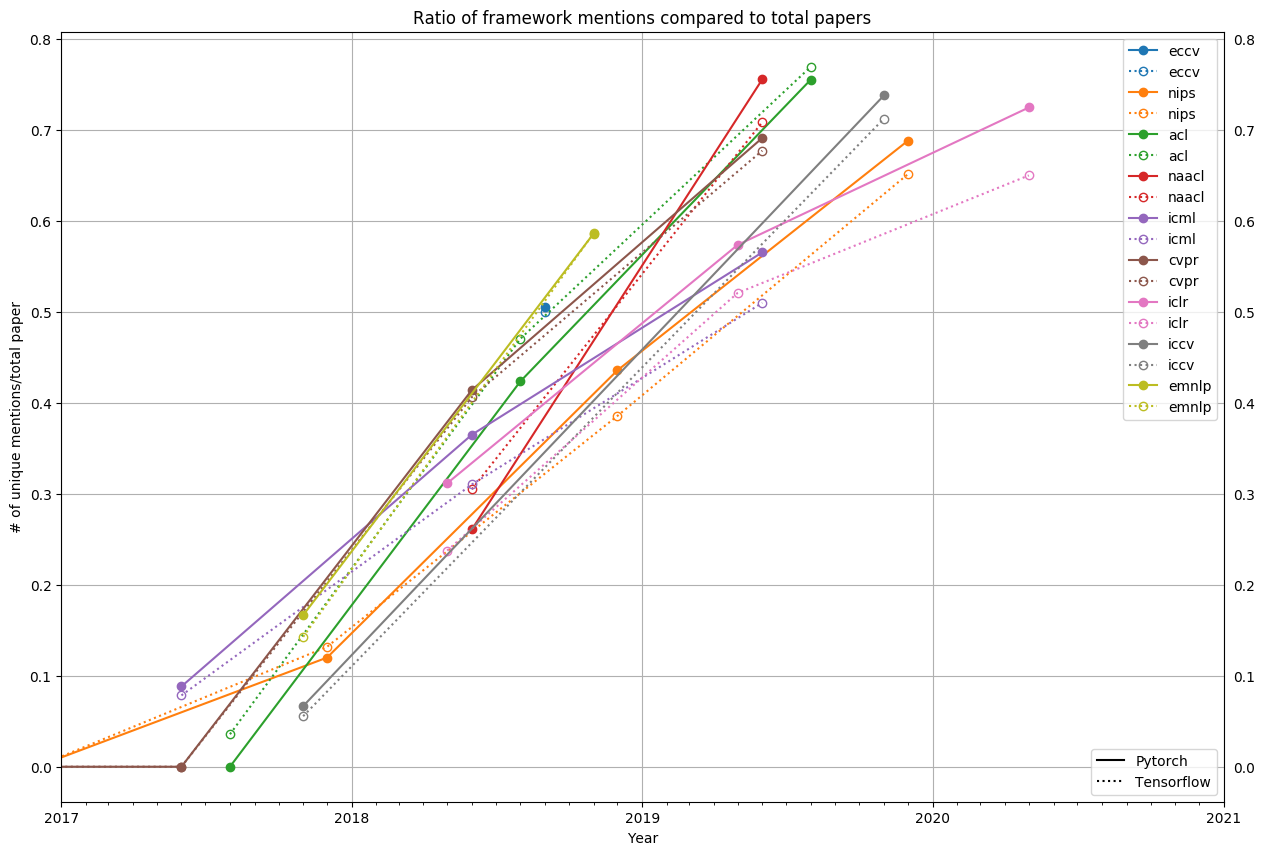

In [32]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots()

# ax.set_ylim(0,125)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim(np.datetime64('2017'), np.datetime64('2021'))
ax.set_facecolor((1,1,1,1))
plt.rcParams["figure.figsize"] = (15,10)
plt.tick_params(labelright=True)
prop_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
nlp_confs = ['naacl', 'acl', 'emnlp']
cv_confs = ['cvpr', 'eccv', 'iccv']
ml_confs = ['nips', 'iclr', 'icml']
csvfile = open('data.csv', 'w')
writer = csv.writer(csvfile)
for conf in confs:
    if conf == 'colt' or conf == 'aistats':
        continue
    pytorch = []
    pytorch_corr = []
    tf = []
    tf_corr = []
    dates = []
    print(conf)
    for year in sorted(confs[conf]):
        ws = word_sets[conf][year]
        date = np.datetime64(f"{year}-{conf_month[conf]:02}")
        dates.append(date)

        pytorch_set = ws['pytorch'] - ws['tensorflow']
        tf_set = ws['tensorflow'] - ws['pytorch']
        biased_set = ws['facebook'] | ws['google']
        pytorch.append(len(pytorch_set))
        tf.append(len(tf_set))
        pytorch_corr.append(len(pytorch_set - biased_set))
        tf_corr.append(len(tf_set- biased_set))
#         if len(tf_set) > 0:
#             print(len(pytorch_set - biased_set)/(len(pytorch_set - biased_set) + len(tf_set - biased_set)))
        print(year)
#         print(pytorch_set)

        print("total papers", len(confs[conf][year]))
#         print("ratio: ", len(ws['pytorch'] | ws['tensorflow'])/len(confs[conf][year]))
        print("pytorch", len(pytorch_set))
#         print("pytorch independent", pytorch_corr[-1])
        print("tensorflow", len(tf_set))
#         print(tf_set)
#         print("tensorflow independent", tf_corr[-1])
    print()
#     plt.figure()
    c=prop_cycle[0]
    prop_cycle = prop_cycle[1:] + prop_cycle[:1]
#     alpha = 1.0 if conf in ['naacl', 'acl', 'emnlp'] else 0.1
#     alpha = 1.0 if conf in nlp_confs else 0.2
    alpha = 1.0
    plt.plot(dates, 
            [a/(a+b) if a+b > 0 else None for a,b in zip(pytorch_corr, tf_corr)],
#              pytorch_corr,
            label = conf,
            marker = 'o',
             color = c,
            alpha=alpha)
    plt.plot(dates, 
             [a/(a+b) if a+b > 0 else None for a,b in zip(pytorch, tf)],
#              tf_corr,
            label = conf,
            marker = 'o',
            markerfacecolor='none',
            linestyle=':',
            color=c,
            alpha=alpha)
    
    plt.legend()
plt.ylabel('# of unique mentions/total paper')
vals = ax.get_yticks()
# ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
plt.xlabel('Year')
#     plt.plot(dates, pytorch, color='blue')
#     plt.plot(dates, tf, color='orange')
solid_line = Line2D([0], [0], color='black', label='Pytorch')
dashed_line = Line2D([0], [0], linestyle=':', color='black', label='Tensorflow')
csvfile.close()

legend1 = plt.legend(handles=[solid_line, dashed_line], loc=4)
plt.legend()
plt.grid()
plt.gca().add_artist(legend1)

plt.title("Ratio of framework mentions compared to total papers")


In [41]:
conf = 'iclr'
for year in sorted(confs[conf]):
    ws = word_sets[conf][year]
    biased_set = ws['facebook'] | ws['google']

    print(year)
    print("total papers", len(confs[conf][year]))
    print("pytorch", len(ws['pytorch'] - ws['tensorflow']))
    print("pytorch independent", len(ws['pytorch'] - ws['tensorflow'] - biased_set))
    print("tensorflow", len(ws['tensorflow'] - ws['pytorch']))
    print("tensorflow independent", len(ws['tensorflow'] -  ws['pytorch'] - biased_set))
    
    print("jax", len(ws['jax']))
    print(ws['jax'])
#     print("dynet", len(ws['dynet']))
#     print(ws['dynet'] & ws['parsing'])
#     print(ws['dynet'] & ws['autobatching'])
#     print(ws['dynet'] - ws['autobatching'] - ws['parsing'])
#     print('huggingface', len(ws['huggingface']))
#     print('opennmt-py', len(ws['opennmt-py']))
#     print('fairseq', len(ws['fairseq']))
#     print('opennmt', len(ws['opennmt-py']))
    print()


2018
total papers 337
pytorch 29
pytorch independent 24
tensorflow 93
tensorflow independent 57
jax 1
{'81734f17'}

2019
total papers 502
pytorch 87
pytorch independent 72
tensorflow 80
tensorflow independent 52
jax 4
{'97ccb210', '3aba9bfa', 'ddd76e69', '2710dd70'}

2020
total papers 687
pytorch 171
pytorch independent 142
tensorflow 92
tensorflow independent 58
jax 7
{'c5b2f94c', '5db87b77', '7162bb89', '27af3c76', 'dbfa9e5b', '83590fb9', 'd90620d0'}



In [92]:
pytorch = set()
tf = set()
fb = set()
google = set()
for i in word_sets.values():
    for j in i.values():
        pytorch |= j['pytorch']
        tf |= j['tensorflow']
        fb |= j['facebook']
        google |= j['google']
print(len(pytorch & fb)/len(fb))
print(len(google & tf)/len(google))

0.1791907514450867
0.23529411764705882


In [8]:
authors = defaultdict(lambda :defaultdict(list))
for conf in confs:
    if conf in ['aistats', 'colt']:
        continue
    for year in ['2018', '2019']:
        ws = word_sets[conf][year]
        if year not in confs[conf]:
            continue
        for paper in confs[conf][year]:
            cur_authors = paper['authors']
            for i in cur_authors:
                i = i.strip()
            if paper['id'] in ws['google'] | ws['facebook']:
                continue 
            for i in cur_authors[-1:]:

                if paper['id'] in ws['pytorch'] - ws['tensorflow']:
                    authors[i][year].append('pytorch')
                elif paper['id'] in ws['tensorflow'] - ws['pytorch']:
                    authors[i][year].append('tf')
                else:
                    authors[i][year].append('')
#             print(paper['id'] in ws['pytorch'])
#             break
#         print(len(confs[conf][year]))

In [9]:
pt_converts = []
tf_converts = []
pt_new = []
tf_new = []
tf_stay = []
pt_stay = []
total_pt = []

for name in authors:
    def sgn(x):
        if x == 0: return 0
        return 1 if x>0 else -1

    def convert_score(s):
        if s == 'pytorch': return 1
        elif s == 'tf': return -1
        else: return 0
    author = authors[name]
    if len(author['2019']) == 0:
        continue
    cnts18 = sum([convert_score(i) for i in author['2018']])
    cnts19 = sum([convert_score(i) for i in author['2019']])
    published18 = len(author['2018']) > 0
    published19 = len(author['2019']) > 0
    if sgn(cnts19) == 1:
        total_pt.append((name, author))
    if published18 and published19:
        if sgn(cnts18) == 1 and sgn(cnts19) == -1:
#             print('tf convert', name, author)
            tf_converts.append((name, author))
        elif sgn(cnts18) == -1 and sgn(cnts19) == 1:
#             print('pt convert', name, author)
#             print(name, author['google'])
            
            pt_converts.append((name, author))
        elif sgn(cnts18) == sgn(cnts19) and cnts19 == -1:
            tf_stay.append((name, author))
        elif sgn(cnts18) == sgn(cnts19) and cnts19 == 1:
            pt_stay.append((name, author))
    elif not published18 and published19:
        if sgn(cnts19) == 1:
#             print('new pt', name, author)
            pt_new.append((name, author))
        elif sgn(cnts19) == -1:
            tf_new.append((name, author))
#             print('new tf', name, author)
    

        

In [10]:
print(len(pt_converts))
print(len(tf_converts))
print()
print(len(pt_new))
print(len(tf_new))
print()
print(len(pt_stay))
print(len(tf_stay))
print()
print(len(total_pt))

23
3

332
170

32
20

471


In [254]:
print(tf_converts)

[('Tiejun Zhao', defaultdict(<class 'list'>, {'2018': ['', 'pytorch', ''], '2019': ['', '', 'tf', '', '']})), ('Jinwen Ma', defaultdict(<class 'list'>, {'2018': ['pytorch'], '2019': ['', 'tf']})), ('Ligeng Zhu', defaultdict(<class 'list'>, {'2018': ['pytorch'], '2019': ['tf']})), ('Min-Yen Kan', defaultdict(<class 'list'>, {'2018': ['pytorch'], '2019': ['', 'tf']})), ('Julian McAuley', defaultdict(<class 'list'>, {'2018': ['pytorch', '', ''], '2019': ['', '', 'tf']})), ('Ryan Cotterell', defaultdict(<class 'list'>, {'2019': ['', '', '', '', '', '', '', '', '', '', '', '', 'tf'], '2018': ['', '', '', 'pytorch']})), ('Kun Bai', defaultdict(<class 'list'>, {'2019': ['tf'], '2018': ['pytorch']})), ('Tianyi Zhou', defaultdict(<class 'list'>, {'2019': ['tf', '', ''], '2018': ['pytorch', 'pytorch', 'tf']})), ('Erick Cobos', defaultdict(<class 'list'>, {'2018': ['pytorch'], '2019': ['tf']})), ('Emmanouil Froudarakis', defaultdict(<class 'list'>, {'2018': ['pytorch'], '2019': ['tf']})), ('Jacob

In [264]:
print(pt_converts)

[('Trevor Darrell', defaultdict(<class 'list'>, {'2018': ['', '', '', '', '', '', '', '', '', '', '', 'tf', ''], '2019': ['', '', 'pytorch']})), ('Dongze Lian', defaultdict(<class 'list'>, {'2018': ['', 'tf'], '2019': ['pytorch']})), ('Nenghai Yu', defaultdict(<class 'list'>, {'2018': ['', '', 'tf', ''], '2019': ['pytorch']})), ('Chen Sun', defaultdict(<class 'list'>, {'2018': ['', 'tf', 'tf', 'tf'], '2019': ['', '', 'pytorch']})), ('Angjoo Kanazawa', defaultdict(<class 'list'>, {'2018': ['', '', '', 'tf'], '2019': ['', 'pytorch']})), ('Muhammed Kocabas', defaultdict(<class 'list'>, {'2018': ['tf'], '2019': ['pytorch']})), ('Huan Zhang', defaultdict(<class 'list'>, {'2018': ['pytorch', 'tf', 'tf', '', ''], '2019': ['', '', '', 'pytorch']})), ('Cho-Jui Hsieh', defaultdict(<class 'list'>, {'2018': ['pytorch', 'tf', '', '', '', '', '', 'tf'], '2019': ['', '', 'pytorch', 'pytorch']})), ('Jie Zhou', defaultdict(<class 'list'>, {'2018': ['', 'tf', '', '', '', 'pytorch', 'tf', 'tf', '', '', '

In [11]:
print(tf_stay)

[('Hongdong Li', defaultdict(<class 'list'>, {'2018': ['tf', ''], '2019': ['tf']})), ('Xueqi Cheng', defaultdict(<class 'list'>, {'2018': ['tf', 'tf', '', ''], '2019': ['tf', '']})), ('Rui Yan', defaultdict(<class 'list'>, {'2019': ['', 'tf', 'pytorch', 'tf'], '2018': ['', '', 'tf']})), ('Zenglin Xu', defaultdict(<class 'list'>, {'2019': ['tf'], '2018': ['tf']})), ('Siu Cheung Hui', defaultdict(<class 'list'>, {'2019': ['tf'], '2018': ['tf', 'tf', 'tf', 'tf']})), ('David Bamman', defaultdict(<class 'list'>, {'2019': ['', 'tf'], '2018': ['tf']})), ('Chengqi Zhang', defaultdict(<class 'list'>, {'2019': ['tf'], '2018': ['tf']})), ('Philipp Hennig', defaultdict(<class 'list'>, {'2018': ['tf'], '2019': ['tf']})), ('Lawrence Carin Duke', defaultdict(<class 'list'>, {'2018': ['', '', 'tf'], '2019': ['tf', '']})), ('Frank Hutter', defaultdict(<class 'list'>, {'2018': ['tf'], '2019': ['', '', 'tf']})), ('Francois Fleuret', defaultdict(<class 'list'>, {'2018': ['tf', ''], '2019': ['tf']})), ('Pe